##Exploratory Data Analysis of SAML-D Dataset

In [8]:
# Step 1: Upload kaggle.json (API key you downloaded from Kaggle)
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hebaboukaedbey","key":"335807e7e77cf01c61244896b0f7b245"}'}

In [9]:
# Step 2: Put kaggle.json in the right folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




In [10]:
# Step 3: Download the dataset from Kaggle
!kaggle datasets download berkanoztas/synthetic-transaction-monitoring-dataset-aml

# Step 4: Unzip the dataset
import zipfile

with zipfile.ZipFile("synthetic-transaction-monitoring-dataset-aml.zip", "r") as zip_ref:
    zip_ref.extractall("data")


Dataset URL: https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml
License(s): CC-BY-NC-SA-4.0
synthetic-transaction-monitoring-dataset-aml.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [12]:
DATASET_DIR = "/content/drive/MyDrive/kaggle_datasets/SAML-D"


In [13]:
import zipfile

# unzip into Drive folder
with zipfile.ZipFile("synthetic-transaction-monitoring-dataset-aml.zip", "r") as zip_ref:
    zip_ref.extractall(DATASET_DIR)


In [46]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [15]:
df = pl.read_csv(f"{DATASET_DIR}/SAML-D.csv")
df.head()



Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
str,str,i64,i64,f64,str,str,str,str,str,i64,str
"""10:35:19""","""2022-10-07""",8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits"""
"""10:35:20""","""2022-10-07""",1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0,"""Normal_Fan_Out"""
"""10:35:20""","""2022-10-07""",287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,"""Normal_Small_Fan_Out"""
"""10:35:21""","""2022-10-07""",5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0,"""Normal_Fan_In"""
"""10:35:21""","""2022-10-07""",9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits"""


In [16]:
df.shape

(9504852, 12)

In [18]:
def polars_info(df: pl.DataFrame):
    print(f"Rows: {df.height}, Columns: {df.width}")
    print("\nColumn summary:")
    for name, dtype in zip(df.columns, df.dtypes):
        nulls = df.select(pl.col(name).is_null().sum()).item()
        print(f"{name:25} {str(dtype):15} nulls: {nulls}")


In [19]:
polars_info(df)

Rows: 9504852, Columns: 12

Column summary:
Time                      String          nulls: 0
Date                      String          nulls: 0
Sender_account            Int64           nulls: 0
Receiver_account          Int64           nulls: 0
Amount                    Float64         nulls: 0
Payment_currency          String          nulls: 0
Received_currency         String          nulls: 0
Sender_bank_location      String          nulls: 0
Receiver_bank_location    String          nulls: 0
Payment_type              String          nulls: 0
Is_laundering             Int64           nulls: 0
Laundering_type           String          nulls: 0


In [20]:
df.describe()

statistic,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
str,str,str,f64,f64,f64,str,str,str,str,str,f64,str
"""count""","""9504852""","""9504852""",9.504852e6,9.504852e6,9.504852e6,"""9504852""","""9504852""","""9504852""","""9504852""","""9504852""",9.504852e6,"""9504852"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""0"""
"""mean""",null,null,5.0066e9,5.0060e9,8762.967601,null,null,null,null,null,0.001039,null
"""std""",null,null,2.8858e9,2.8848e9,25614.953,null,null,null,null,null,0.032213,null
"""min""","""00:00:00""","""2022-10-07""",9018.0,9018.0,3.73,"""Albanian lek""","""Albanian lek""","""Albania""","""Albania""","""ACH""",0.0,"""Behavioural_Change_1"""
"""25%""",null,null,2.5131e9,2.5132e9,2143.69,null,null,null,null,null,0.0,null
"""50%""",null,null,5.0010e9,5.0026e9,6113.72,null,null,null,null,null,0.0,null
"""75%""",null,null,7.5051e9,7.5024e9,10458.46,null,null,null,null,null,0.0,null
"""max""","""23:59:59""","""2023-08-23""",1.0000e10,1.0000e10,1.2618e7,"""Yen""","""Yen""","""USA""","""USA""","""Debit card""",1.0,"""Structuring"""


In [21]:
df['Laundering_type'].value_counts()

Laundering_type,count
str,u32
"""Normal_Group""",528351
"""Normal_single_large""",20641
"""Cash_Withdrawal""",1334
"""Structuring""",1870
"""Single_large""",250
…,…
"""Deposit-Send""",945
"""Fan_In""",364
"""Normal_Fan_Out""",2302220



--- Laundering_type counts ---

shape: (28, 2)
┌────────────────────────┬─────────┐
│ Laundering_type        ┆ count   │
│ ---                    ┆ ---     │
│ str                    ┆ u32     │
╞════════════════════════╪═════════╡
│ Normal_Small_Fan_Out   ┆ 3477717 │
│ Normal_Fan_Out         ┆ 2302220 │
│ Normal_Fan_In          ┆ 2104285 │
│ Normal_Group           ┆ 528351  │
│ Normal_Cash_Withdrawal ┆ 305031  │
│ …                      ┆ …       │
│ Behavioural_Change_2   ┆ 345     │
│ Scatter-Gather         ┆ 338     │
│ Single_large           ┆ 250     │
│ Fan_Out                ┆ 237     │
│ Over-Invoicing         ┆ 54      │
└────────────────────────┴─────────┘


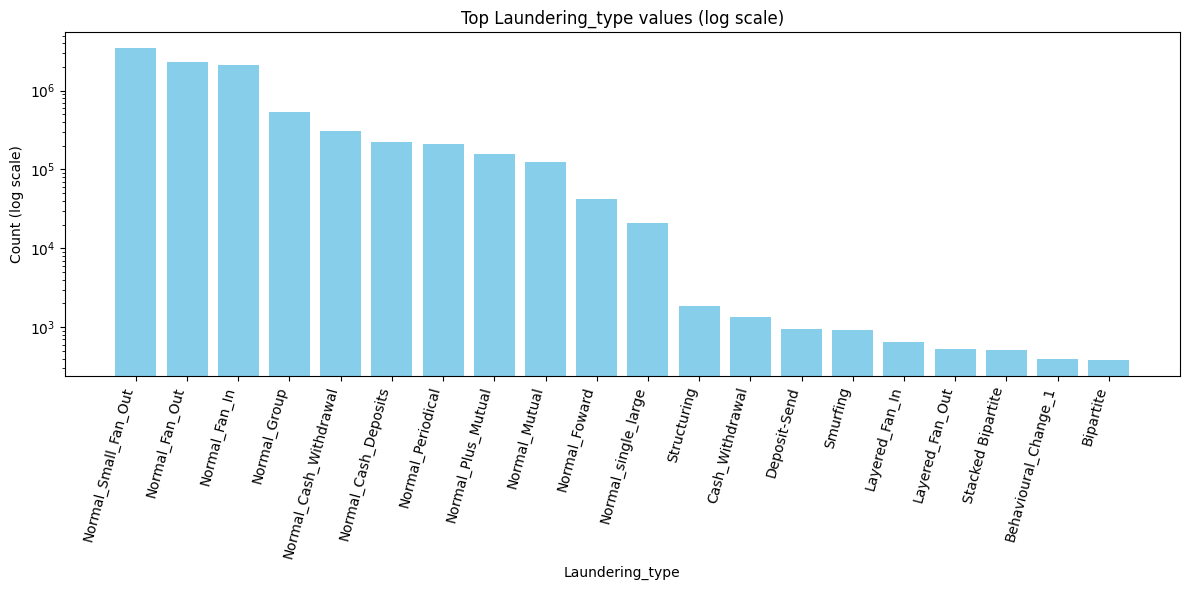


Median Amount by Laundering_type:

shape: (20, 2)
┌─────────────────────┬───────────────┐
│ Laundering_type     ┆ median_amount │
│ ---                 ┆ ---           │
│ str                 ┆ f64           │
╞═════════════════════╪═══════════════╡
│ Over-Invoicing      ┆ 4.2195e6      │
│ Normal_single_large ┆ 184042.06     │
│ Single_large        ┆ 183565.385    │
│ Normal_Mutual       ┆ 27394.47      │
│ Cycle               ┆ 21494.893744  │
│ …                   ┆ …             │
│ Layered_Fan_Out     ┆ 6729.766632   │
│ Deposit-Send        ┆ 6331.86       │
│ Normal_Foward       ┆ 6165.64       │
│ Structuring         ┆ 4800.35       │
│ Normal_Periodical   ┆ 4467.97       │
└─────────────────────┴───────────────┘


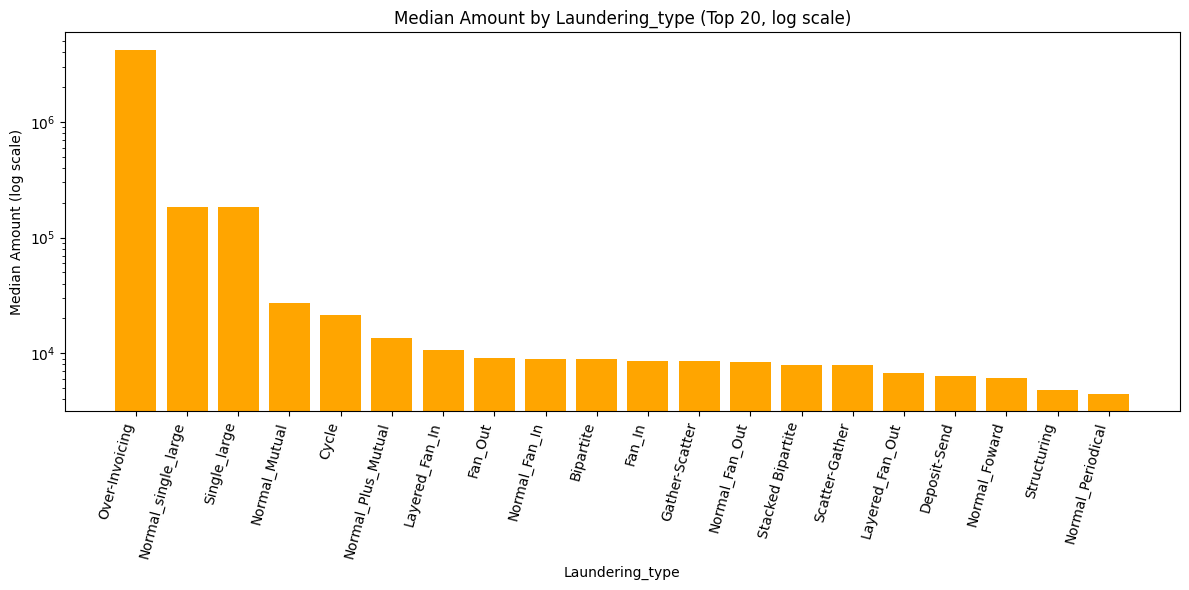

In [64]:
if "Laundering_type" in df.columns:
    #Count of laundering types
    lt_counts = (
        df.group_by("Laundering_type")
          .agg(pl.len().alias("count"))
          .sort("count", descending=True)
    )

    print("\n--- Laundering_type counts ---\n")
    print(lt_counts.head(30))

    #Counts plot (log scale)
    plt.figure(figsize=(12, 6))
    plt.bar(
        lt_counts["Laundering_type"].to_list()[:20],
        lt_counts["count"].to_list()[:20],
        color="skyblue"
    )
    plt.yscale("log")
    plt.title("Top Laundering_type values (log scale)")
    plt.xlabel("Laundering_type")
    plt.ylabel("Count (log scale)")
    plt.xticks(rotation=75, ha="right")
    plt.tight_layout()
    plt.show()

    #Median amount by laundering type
    lt_amt = (
        df.group_by("Laundering_type")
          .agg(pl.median("Amount").alias("median_amount"))
          .sort("median_amount", descending=True)
    )

    print("\nMedian Amount by Laundering_type:\n")
    print(lt_amt.head(20))

    #Median amounts plot (log scale)
    plt.figure(figsize=(12, 6))
    plt.bar(
        lt_amt["Laundering_type"].to_list()[:20],
        lt_amt["median_amount"].to_list()[:20],
        color="orange"
    )
    plt.yscale("log")
    plt.title("Median Amount by Laundering_type (Top 20, log scale)")
    plt.xlabel("Laundering_type")
    plt.ylabel("Median Amount (log scale)")
    plt.xticks(rotation=75, ha="right")
    plt.tight_layout()
    plt.show()

In [22]:
df['Payment_type'].value_counts()

Payment_type,count
str,u32
"""Cheque""",2011419
"""ACH""",2008807
"""Cash Deposit""",225206
"""Cash Withdrawal""",300477
"""Cross-border""",933931
"""Debit card""",2012103
"""Credit card""",2012909


In [23]:
df['Payment_currency'].value_counts()

Payment_currency,count
str,u32
"""Moroccan dirham""",25395
"""Albanian lek""",24778
"""Yen""",25562
"""UK pounds""",9099293
"""Dirham""",27263
…,…
"""US dollar""",26061
"""Pakistani rupee""",27196
"""Mexican Peso""",24852


In [24]:
df['Received_currency'].value_counts()

Received_currency,count
str,u32
"""Dirham""",42797
"""Euro""",231911
"""Swiss franc""",42931
"""Pakistani rupee""",45993
"""Moroccan dirham""",45748
…,…
"""Mexican Peso""",45255
"""Turkish lira""",42545
"""Yen""",45814


In [32]:
target_ratio = (target_counts.with_columns((pl.col("len") / len(df)).round(4).alias("ratio")))

print(target_ratio)


shape: (2, 3)
┌───────────────┬─────────┬───────┐
│ Is_laundering ┆ len     ┆ ratio │
│ ---           ┆ ---     ┆ ---   │
│ i64           ┆ u32     ┆ f64   │
╞═══════════════╪═════════╪═══════╡
│ 0             ┆ 9494979 ┆ 0.999 │
│ 1             ┆ 9873    ┆ 0.001 │
└───────────────┴─────────┴───────┘


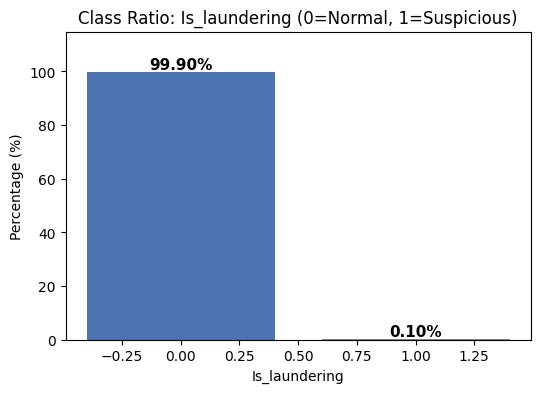

In [36]:
# Compute total
total = len(df)

# Extract lists
classes = target_counts["Is_laundering"].to_list()
counts = target_counts["len"].to_list()
percentages = [(c / total) * 100 for c in counts]

# Plot
plt.figure(figsize=(6,4))
bars = plt.bar(classes, percentages, color=["#4C72B0", "#55A868"])

# Add text labels above bars
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.2f}%",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        color="black"
    )

plt.title("Class Ratio: Is_laundering (0=Normal, 1=Suspicious)")
plt.xlabel("Is_laundering")
plt.ylabel("Percentage (%)")
plt.ylim(0, max(percentages) * 1.15)  # add headroom for labels
plt.show()


In [40]:
# Combine Date and Time safely into one timestamp column
df = df.with_columns([
    (
        pl.col("Date").cast(pl.Utf8).str.replace_all(r"^\s+|\s+$", "") +
        pl.lit(" ") +
        pl.col("Time").cast(pl.Utf8).str.replace_all(r"^\s+|\s+$", "")
    )
    .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
    .alias("timestamp")
])

# If timestamp all null (e.g. missing Time), fallback to Date-only parsing
if df["timestamp"].null_count() == df.height:
    df = df.with_columns([
        pl.col("Date").str.strptime(pl.Datetime, "%Y-%m-%d", strict=False).alias("timestamp")
    ])

# Extract time-based features
df = df.with_columns([
    pl.col("timestamp").dt.hour().alias("hour"),
    pl.col("timestamp").dt.weekday().alias("dayofweek"),
    pl.col("timestamp").dt.date().alias("date_only")
])

df.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,timestamp,hour,dayofweek,date_only
str,str,i64,i64,f64,str,str,str,str,str,i64,str,datetime[μs],i8,i8,date
"""10:35:19""","""2022-10-07""",8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits""",2022-10-07 10:35:19,10,5,2022-10-07
"""10:35:20""","""2022-10-07""",1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0,"""Normal_Fan_Out""",2022-10-07 10:35:20,10,5,2022-10-07
"""10:35:20""","""2022-10-07""",287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,"""Normal_Small_Fan_Out""",2022-10-07 10:35:20,10,5,2022-10-07
"""10:35:21""","""2022-10-07""",5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0,"""Normal_Fan_In""",2022-10-07 10:35:21,10,5,2022-10-07
"""10:35:21""","""2022-10-07""",9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits""",2022-10-07 10:35:21,10,5,2022-10-07


In [42]:
# Daily count for normal transactions (Is_laundering = 0)
daily_normal = (
    df.filter(pl.col("Is_laundering") == 0)
      .group_by("date_only")
      .agg(pl.len().alias("count_normal"))
      .sort("date_only")
)

# Daily count for suspicious transactions (Is_laundering = 1)
daily_suspicious = (
    df.filter(pl.col("Is_laundering") == 1)
      .group_by("date_only")
      .agg(pl.len().alias("count_suspicious"))
      .sort("date_only")
)

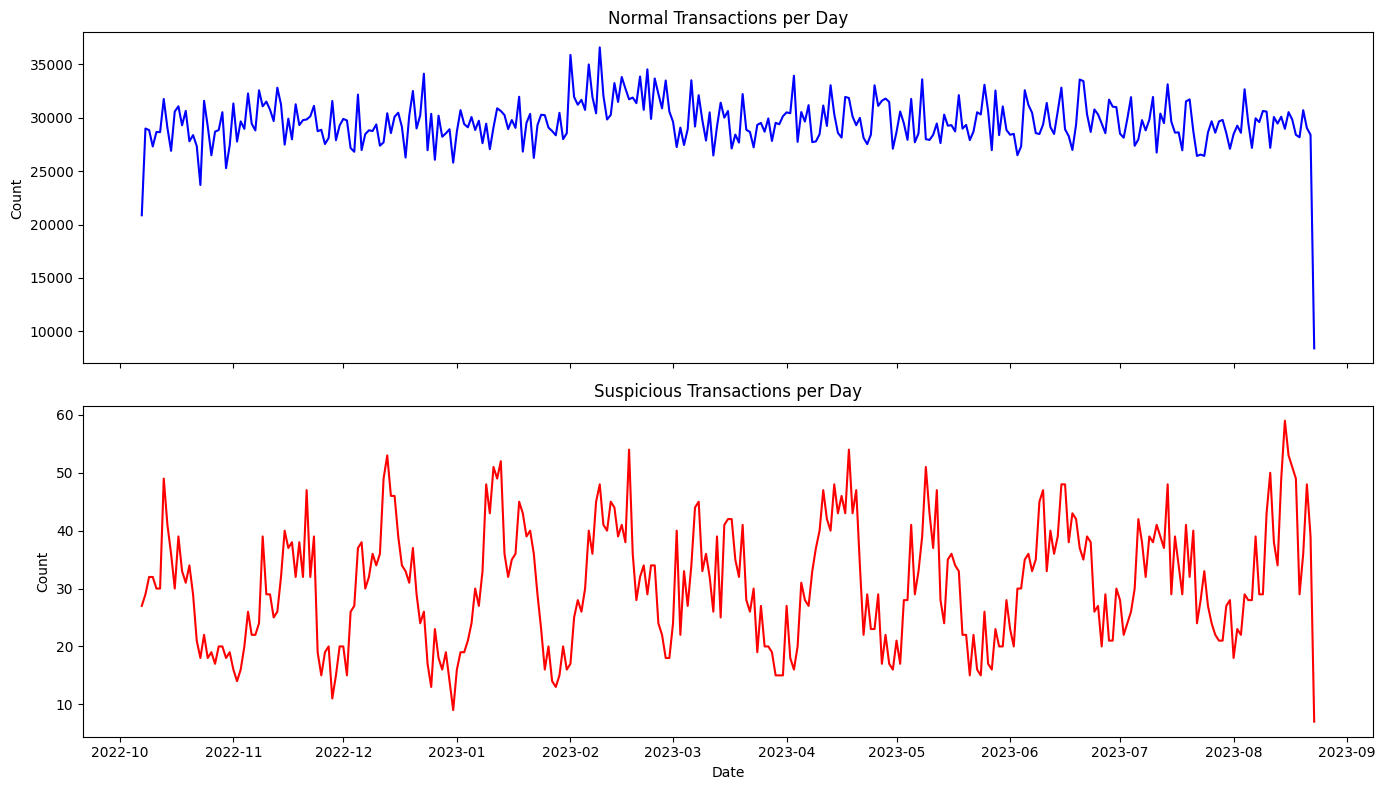

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

#Plot Normal Transactions
axes[0].plot(
    daily_normal["date_only"].to_list(),
    daily_normal["count_normal"].to_list(),
    color="blue"
)
axes[0].set_title("Normal Transactions per Day")
axes[0].set_ylabel("Count")

#Plot Suspicious Transactions
axes[1].plot(
    daily_suspicious["date_only"].to_list(),
    daily_suspicious["count_suspicious"].to_list(),
    color="red"
)
axes[1].set_title("Suspicious Transactions per Day")
axes[1].set_ylabel("Count")

plt.xlabel("Date")
plt.tight_layout()
plt.show()



In [47]:
#Clean & normalize sender/receiver locations
def normalize_location(col: str) -> pl.Expr:
    return (
        pl.col(col)
        .cast(pl.Utf8)
        .str.replace_all(r"^\s+|\s+$", "")       # strip
        .str.replace_all(r"\s+", " ")            # collapse spaces
        .str.to_lowercase()
        # unify common UK variants -> "united kingdom"
        .str.replace_all(r"\b(u\.?k\.?|gb|gbr|great britain|england|scotland|wales|northern ireland)\b", "united kingdom")
        # title-case for display
        .str.to_titlecase()
    )

df = df.with_columns([
    normalize_location("Sender_bank_location").alias("Sender_bank_location_norm"),
    normalize_location("Receiver_bank_location").alias("Receiver_bank_location_norm"),
])

#Value counts (sorted DESC)
top_senders = (
    df.group_by("Sender_bank_location_norm")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
      .head(15)
      .rename({"Sender_bank_location_norm": "Sender_bank_location"})
)

top_receivers = (
    df.group_by("Receiver_bank_location_norm")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
      .head(15)
      .rename({"Receiver_bank_location_norm": "Receiver_bank_location"})
)

print("\nTop sender locations:\n", top_senders)
print("\nTop receiver locations:\n", top_receivers)


Top sender locations:
 shape: (15, 2)
┌──────────────────────┬─────────┐
│ Sender_bank_location ┆ count   │
│ ---                  ┆ ---     │
│ str                  ┆ u32     │
╞══════════════════════╪═════════╡
│ United Kingdom       ┆ 9183088 │
│ Turkey               ┆ 20902   │
│ Switzerland          ┆ 20503   │
│ Pakistan             ┆ 20346   │
│ Uae                  ┆ 20081   │
│ …                    ┆ …       │
│ France               ┆ 18702   │
│ Japan                ┆ 18468   │
│ Morocco              ┆ 18437   │
│ Austria              ┆ 18050   │
│ Mexico               ┆ 17662   │
└──────────────────────┴─────────┘

Top receiver locations:
 shape: (15, 2)
┌────────────────────────┬─────────┐
│ Receiver_bank_location ┆ count   │
│ ---                    ┆ ---     │
│ str                    ┆ u32     │
╞════════════════════════╪═════════╡
│ United Kingdom         ┆ 8864634 │
│ Pakistan               ┆ 38980   │
│ Austria                ┆ 38844   │
│ Albania                ┆ 38

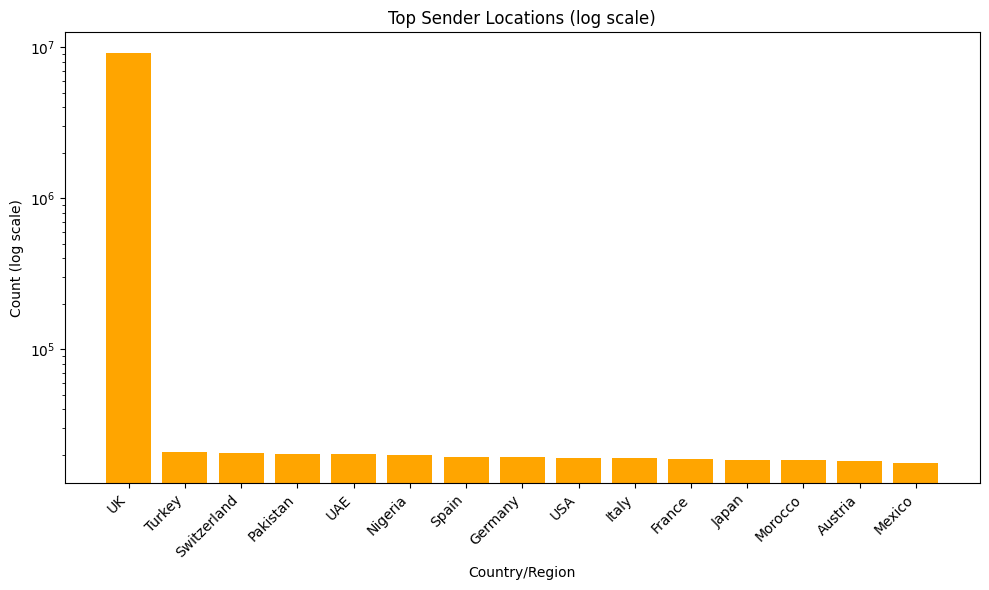

In [48]:
# Compute top sender locations (sorted by count descending)
top_senders = (
    df.group_by("Sender_bank_location")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
      .head(15)
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(
    top_senders["Sender_bank_location"].to_list(),
    top_senders["count"].to_list(),
    color="orange"
)
plt.yscale("log")  # log scale for visibility
plt.title("Top Sender Locations (log scale)")
plt.xlabel("Country/Region")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

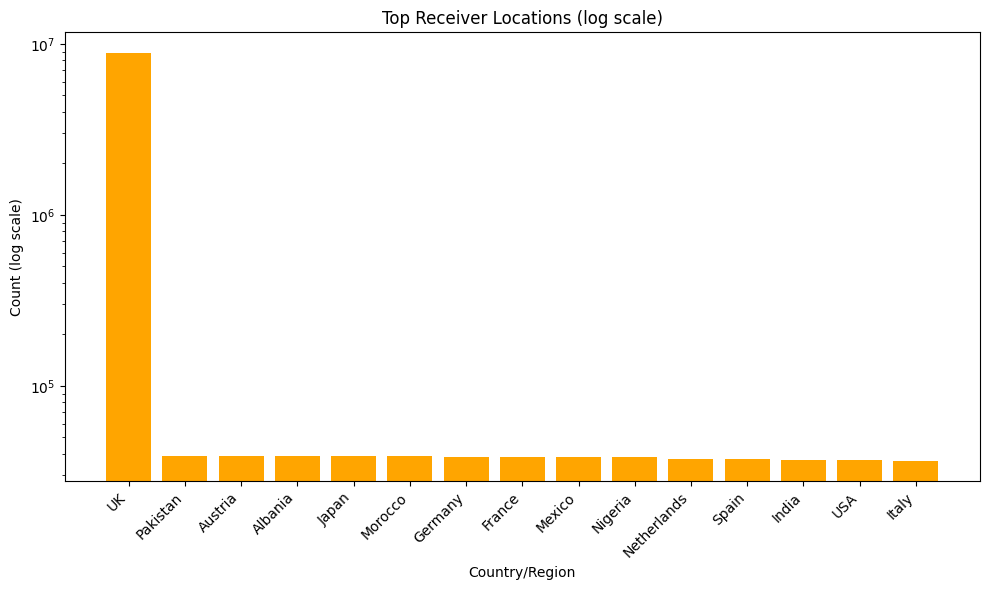

In [50]:
# Compute top receiver locations
top_receivers = (
    df.group_by("Receiver_bank_location")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
      .head(15)
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(
    top_receivers["Receiver_bank_location"].to_list(),
    top_receivers["count"].to_list(),
    color="orange"
)
plt.yscale("log")  # log scale to reveal smaller countries
plt.title("Top Receiver Locations (log scale)")
plt.xlabel("Country/Region")
plt.ylabel("Count (log scale)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Top location routes:
 shape: (20, 2)
┌──────────────────┬─────────┐
│ route            ┆ count   │
│ ---              ┆ ---     │
│ str              ┆ u32     │
╞══════════════════╪═════════╡
│ UK → UK          ┆ 8569083 │
│ UK → Pakistan    ┆ 37595   │
│ UK → Austria     ┆ 37360   │
│ UK → Morocco     ┆ 37146   │
│ UK → Japan       ┆ 37130   │
│ …                ┆ …       │
│ UK → Switzerland ┆ 34402   │
│ UK → UAE         ┆ 34336   │
│ UK → Turkey      ┆ 34126   │
│ Turkey → UK      ┆ 19265   │
│ Switzerland → UK ┆ 18761   │
└──────────────────┴─────────┘


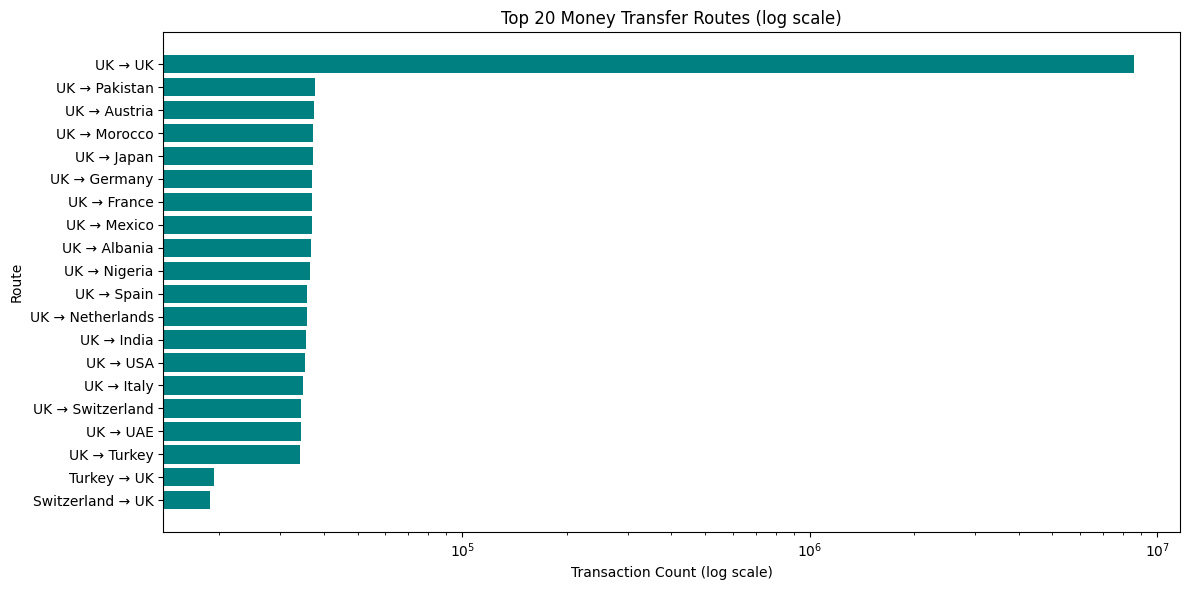

In [54]:
#Create "route" column combining sender and receiver
df = df.with_columns([
    (
        pl.col("Sender_bank_location").cast(pl.Utf8) +
        pl.lit(" → ") +
        pl.col("Receiver_bank_location").cast(pl.Utf8)
    ).alias("route")
])

#Count and sort routes
route_counts = (
    df.group_by("route")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
      .head(20)
)

print("\nTop location routes:\n", route_counts)

#Plot top 20 routes
plt.figure(figsize=(12, 6))
plt.barh(
    route_counts["route"].to_list()[::-1],   # y-axis labels (reversed for descending order)
    route_counts["count"].to_list()[::-1],   # counts
    color="teal"
)
plt.xscale("log")
plt.title("Top 20 Money Transfer Routes (log scale)")
plt.xlabel("Transaction Count (log scale)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


Top currency pairs:
 shape: (20, 2)
┌─────────────────────────────┬─────────┐
│ pair                        ┆ count   │
│ ---                         ┆ ---     │
│ str                         ┆ u32     │
╞═════════════════════════════╪═════════╡
│ UK pounds → UK pounds       ┆ 8414112 │
│ UK pounds → Euro            ┆ 220504  │
│ Euro → UK pounds            ┆ 106608  │
│ UK pounds → Pakistani rupee ┆ 43895   │
│ UK pounds → Yen             ┆ 43517   │
│ …                           ┆ …       │
│ Swiss franc → UK pounds     ┆ 25002   │
│ Dirham → UK pounds          ┆ 24808   │
│ Pakistani rupee → UK pounds ┆ 24774   │
│ Naira → UK pounds           ┆ 24729   │
│ US dollar → UK pounds       ┆ 23618   │
└─────────────────────────────┴─────────┘


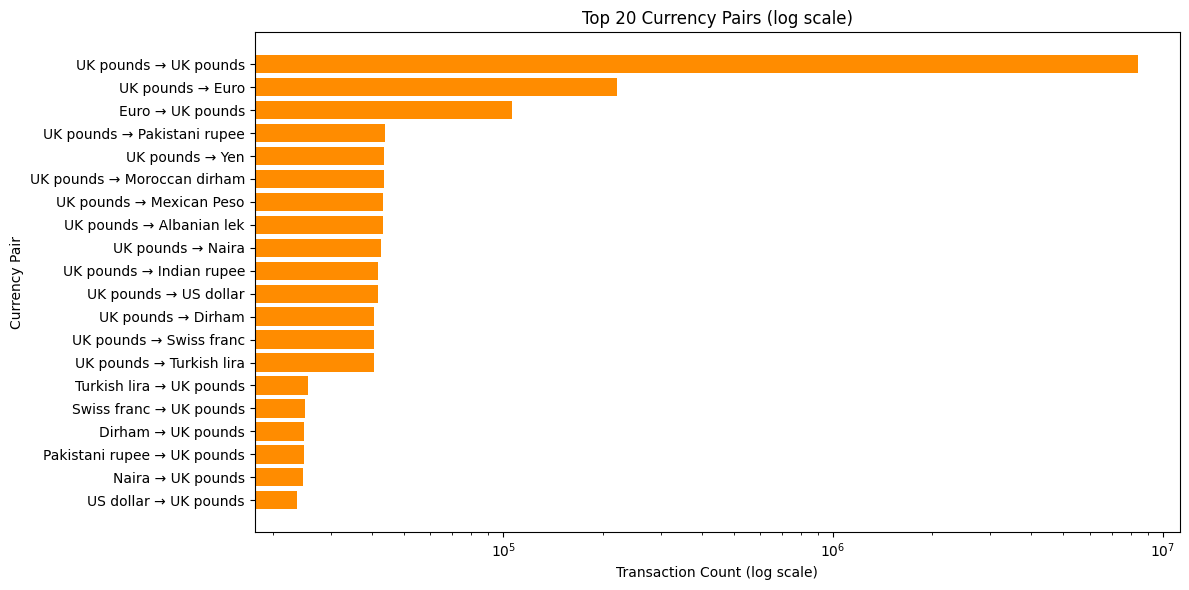

In [56]:
#Create a new column "pair" (Payment_currency → Received_currency)
df = df.with_columns([
    (
        pl.col("Payment_currency").cast(pl.Utf8) +
        pl.lit(" → ") +
        pl.col("Received_currency").cast(pl.Utf8)
    ).alias("pair")
])

#Count and sort currency pairs
pair_counts = (
    df.group_by("pair")
      .agg(pl.len().alias("count"))
      .sort("count", descending=True)
      .head(20)
)

print("\nTop currency pairs:\n", pair_counts)

plt.figure(figsize=(12, 6))
plt.barh(
    pair_counts["pair"].to_list()[::-1],
    pair_counts["count"].to_list()[::-1],
    color="darkorange"
)
plt.xscale("log")  # log scale to show smaller pairs
plt.title("Top 20 Currency Pairs (log scale)")
plt.xlabel("Transaction Count (log scale)")
plt.ylabel("Currency Pair")
plt.tight_layout()
plt.show()

In [59]:
#Start from Monday=0 (Sunday=6)
df = df.with_columns([
    ((pl.col("dayofweek") - 1) % 7).alias("dayofweek")
])

#Probability of laundering by HOUR
hourly = (
    df.group_by("hour")
      .agg([
          pl.len().alias("total"),
          pl.sum("Is_laundering").alias("laundering_count")
      ])
      .with_columns(
          (pl.col("laundering_count") / pl.col("total")).alias("P_laundering_1")
      )
      .sort("hour")
)

print("\nP(Laundering=1) by hour:\n")
print(hourly.select(["hour", "P_laundering_1"]))


#Probability of laundering by DAY OF WEEK (Mon=0)
dow = (
    df.group_by("dayofweek")
      .agg([
          pl.len().alias("total"),
          pl.sum("Is_laundering").alias("laundering_count")
      ])
      .with_columns(
          (pl.col("laundering_count") / pl.col("total")).alias("P_laundering_1")
      )
      .sort("dayofweek")
)

print("\nP(Laundering=1) by dayofweek (Mon=0):\n")
print(dow.select(["dayofweek", "P_laundering_1"]))


P(Laundering=1) by hour:

shape: (24, 2)
┌──────┬────────────────┐
│ hour ┆ P_laundering_1 │
│ ---  ┆ ---            │
│ i8   ┆ f64            │
╞══════╪════════════════╡
│ 0    ┆ 0.001119       │
│ 1    ┆ 0.001          │
│ 2    ┆ 0.001135       │
│ 3    ┆ 0.001138       │
│ 4    ┆ 0.001036       │
│ …    ┆ …              │
│ 19   ┆ 0.000958       │
│ 20   ┆ 0.00088        │
│ 21   ┆ 0.000995       │
│ 22   ┆ 0.000964       │
│ 23   ┆ 0.000961       │
└──────┴────────────────┘

P(Laundering=1) by dayofweek (Mon=0):

shape: (7, 2)
┌───────────┬────────────────┐
│ dayofweek ┆ P_laundering_1 │
│ ---       ┆ ---            │
│ i8        ┆ f64            │
╞═══════════╪════════════════╡
│ 0         ┆ 0.00106        │
│ 1         ┆ 0.00104        │
│ 2         ┆ 0.001049       │
│ 3         ┆ 0.001077       │
│ 4         ┆ 0.001083       │
│ 5         ┆ 0.00098        │
│ 6         ┆ 0.00098        │
└───────────┴────────────────┘


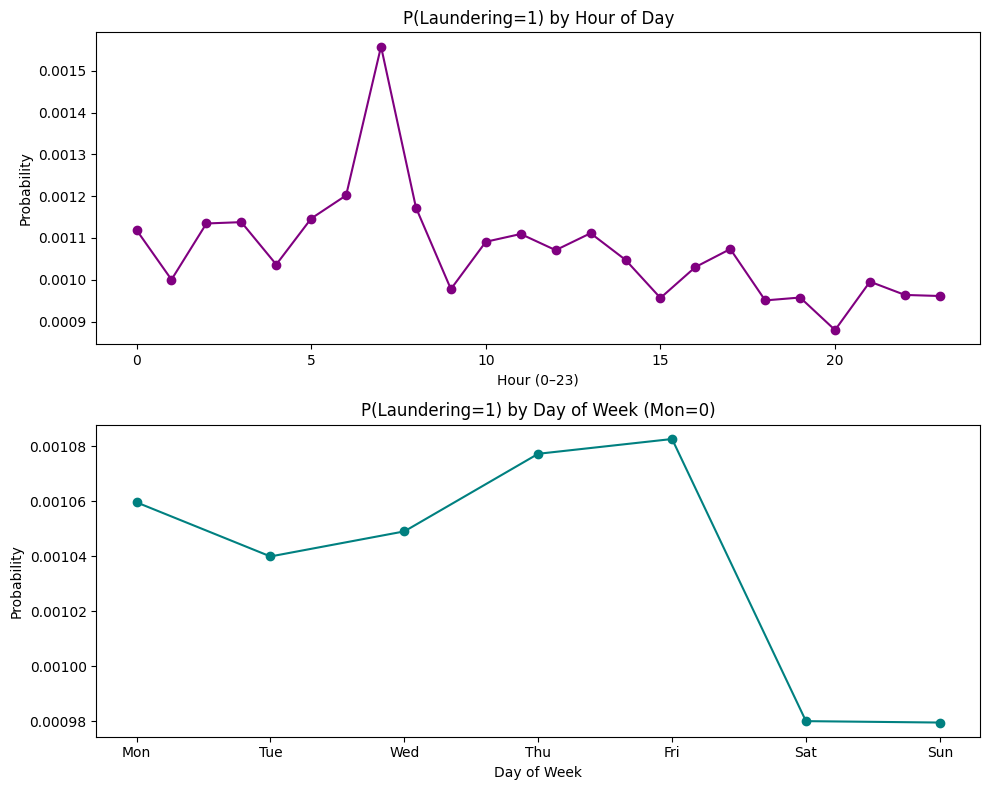

In [60]:

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Hourly probability plot
axes[0].plot(
    hourly["hour"].to_list(),
    hourly["P_laundering_1"].to_list(),
    marker="o",
    color="purple"
)
axes[0].set_title("P(Laundering=1) by Hour of Day")
axes[0].set_xlabel("Hour (0–23)")
axes[0].set_ylabel("Probability")

# Day-of-week probability plot
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
axes[1].plot(
    dow["dayofweek"].to_list(),
    dow["P_laundering_1"].to_list(),
    marker="o",
    color="teal"
)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(weekday_labels)
axes[1].set_title("P(Laundering=1) by Day of Week (Mon=0)")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Probability")

plt.tight_layout()
plt.show()


In [62]:
#copy
df1 = df.clone()

#Encode categorical columns numerically
cat_cols = [
    "Payment_type",
    "Payment_currency",
    "Received_currency",
    "Sender_bank_location",
    "Receiver_bank_location",
    "Laundering_type",
]

for c in cat_cols:
    if c in df1.columns:
        df1 = df1.with_columns([
            pl.col(c)
              .cast(pl.Categorical)
              .to_physical()          # numeric encoding for correlation
              .alias(c)
        ])

#Collect numeric columns
possible_num_cols = [
    "Amount", "hour", "dayofweek",
    "is_cross_border", "is_currency_mismatch",
    "unique_receivers", "unique_senders"
] + cat_cols

num_cols = [c for c in possible_num_cols if c in df1.columns]

#Compute correlations with Is_laundering
corr_list = []
for c in num_cols:
    try:
        val = df1.select(pl.corr(c, "Is_laundering")).item()
        corr_list.append((c, val))
    except Exception:
        pass

#Sort and display results
corr_df = pl.DataFrame(corr_list, schema=["Feature", "Correlation"]).sort("Correlation", descending=True)

print("\nCorrelation to Is_laundering:\n")
print(corr_df)


Correlation to Is_laundering:

shape: (9, 2)
┌────────────────────────┬─────────────┐
│ Feature                ┆ Correlation │
│ ---                    ┆ ---         │
│ str                    ┆ f64         │
╞════════════════════════╪═════════════╡
│ Laundering_type        ┆ 0.256252    │
│ Amount                 ┆ 0.040063    │
│ Received_currency      ┆ 0.024814    │
│ Receiver_bank_location ┆ 0.021825    │
│ Payment_currency       ┆ 0.00931     │
│ Sender_bank_location   ┆ 0.005188    │
│ dayofweek              ┆ -0.000712   │
│ hour                   ┆ -0.001958   │
│ Payment_type           ┆ -0.012735   │
└────────────────────────┴─────────────┘


/tmp/ipython-input-2599537421.py:42: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  corr_df = pl.DataFrame(corr_list, schema=["Feature", "Correlation"]).sort("Correlation", descending=True)


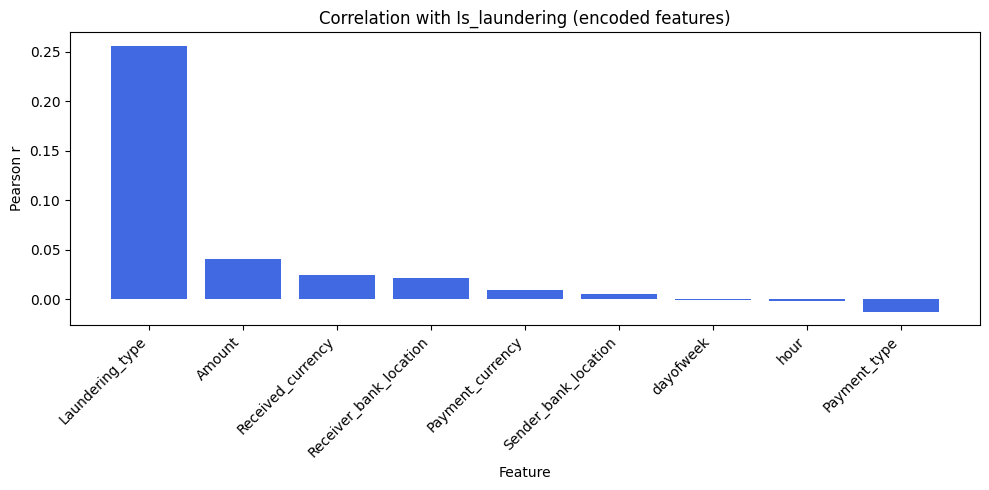

In [63]:
plt.figure(figsize=(10, 5))

# Extract features and correlation values
features = corr_df["Feature"].to_list()
correlations = corr_df["Correlation"].to_list()

# Plot
plt.bar(features, correlations, color="royalblue")
plt.title("Correlation with Is_laundering (encoded features)")
plt.xlabel("Feature")
plt.ylabel("Pearson r")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()